In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# replace with your dataset path
dataset_path='./dataset/dataGaia.csv'
df=pd.read_csv(dataset_path)

In [3]:
df.head()

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,...,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
0,0,47.451110,2.205457,740830319452928,1.1750,8.488,2.263,-8.181,10.966603,0.002786,...,0.090974,NaN,9406.7,918.2012,2.3686,33.161472,2.255,0.404,0.527215,A
1,1,44.375187,2.895901,1402912413121792,1.8937,16.954,7.031,-15.427,10.369156,0.002801,...,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,A
2,2,42.959304,2.920459,1546703623466880,2.9732,2.528,1.795,1.780,10.038978,0.002774,...,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,A
3,3,44.031079,3.203683,1614053005633024,2.2337,10.776,-3.151,-10.305,9.810181,0.002786,...,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,A
4,4,45.463599,3.138095,1753553543188992,4.0179,10.053,1.828,9.885,8.163041,0.002800,...,0.091842,NaN,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,A


In [4]:
df.describe()

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,...,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
count,611689.000000,611689.000000,611689.000000,6.116890e+05,611689.000000,611689.000000,611689.000000,611689.000000,611688.000000,611688.000000,...,611688.000000,611688.000000,16388.000000,611689.000000,611689.000000,611689.000000,597558.000000,578961.000000,538028.000000,597558.000000
mean,47422.859898,109.491138,27.375246,1.013625e+18,1.490339,11.264492,1.416328,-5.646765,13.720603,0.002857,...,0.629558,0.689414,1.452694,7194.982554,2106.054944,8.141795,112.631363,1.815272,3.819473,0.441698
std,28774.834121,99.486049,26.856553,1.382727e+18,2.030546,19.482668,16.120819,14.583911,1.690560,0.000569,...,0.526974,0.316330,0.183810,3738.516381,3212.887195,27.977752,328.978393,0.990190,4.147104,0.232343
min,0.000000,0.000205,-89.098460,3.865554e+10,-5.014100,0.002000,-584.663000,-583.413000,2.740842,0.002757,...,-1.710986,-0.452513,0.424200,3039.200000,10.519300,0.345400,0.034732,0.500000,0.200000,0.001505
25%,21846.000000,46.677751,18.623979,1.415008e+17,0.320800,2.450000,-2.274000,-7.027000,12.775878,0.002765,...,0.323266,0.503698,1.336200,5187.000000,577.857500,1.329100,2.004729,1.036000,0.556000,0.307192
50%,46638.000000,67.259343,31.172183,2.137034e+17,0.872600,5.591000,0.128000,-3.015000,14.102625,0.002772,...,0.480260,0.660124,1.499600,5922.600000,1077.115000,2.031500,10.815703,1.621000,1.493500,0.479016
75%,72125.000000,110.040669,43.118327,1.866048e+18,1.659900,11.078000,3.291000,-0.551000,14.792351,0.002796,...,0.828535,0.909900,1.588225,7988.100000,2529.572300,4.009600,57.071455,2.416000,6.727000,0.568683
max,99999.000000,359.997541,89.774031,6.916186e+18,95.047700,688.189000,606.357000,478.562000,17.649721,0.065528,...,5.552830,2.525836,1.977500,41504.000000,35666.805000,1105.995600,3499.921000,7.521000,13.500000,1.616032


In [5]:
# get the unigue labels
df['SpType-ELS'].unique()

array(['A      ', 'B      ', 'F      ', 'G      ', 'K      ', 'M      ',
       'O      '], dtype=object)

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
# encode the labels
label_encoder = preprocessing.LabelEncoder()
  

df['labels']= label_encoder.fit_transform(df['SpType-ELS'])
  
df['labels'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [8]:
data=df.drop(columns=['SpType-ELS'])

In [9]:
# Count the number of NaN values in each column
nan_count_per_column = data.isna().sum()

# Count the total number of NaN values in the entire DataFrame
total_nan_count = data.isna().sum().sum()

print("Number of NaN values in each column:")
print(nan_count_per_column)

print("Total number of NaN values in the DataFrame:", total_nan_count)

Number of NaN values in each column:
RA_ICRS            0
DE_ICRS            0
Source             0
Plx                0
PM                 0
pmRA               0
pmDE               0
Gmag               1
e_Gmag             1
BPmag              1
e_BPmag            1
RPmag              0
e_RPmag            0
GRVSmag       103968
e_GRVSmag     103968
BP-RP              1
BP-G               1
G-RP               1
pscol         595301
Teff               0
Dist               0
Rad                0
Lum-Flame      14131
Mass-Flame     32728
Age-Flame      73661
z-Flame        14131
labels             0
dtype: int64
Total number of NaN values in the DataFrame: 937895


In [10]:
data.duplicated().sum()

0

In [11]:
data.head()

,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,...,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,labels
0,47.451110,2.205457,740830319452928,1.1750,8.488,2.263,-8.181,10.966603,0.002786,11.007946,...,0.090974,NaN,9406.7,918.2012,2.3686,33.161472,2.255,0.404,0.527215,0
1,44.375187,2.895901,1402912413121792,1.8937,16.954,7.031,-15.427,10.369156,0.002801,10.441856,...,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,0
2,42.959304,2.920459,1546703623466880,2.9732,2.528,1.795,1.780,10.038978,0.002774,10.212755,...,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,0
3,44.031079,3.203683,1614053005633024,2.2337,10.776,-3.151,-10.305,9.810181,0.002786,10.008457,...,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,0
4,45.463599,3.138095,1753553543188992,4.0179,10.053,1.828,9.885,8.163041,0.002800,8.197672,...,0.091842,NaN,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,0


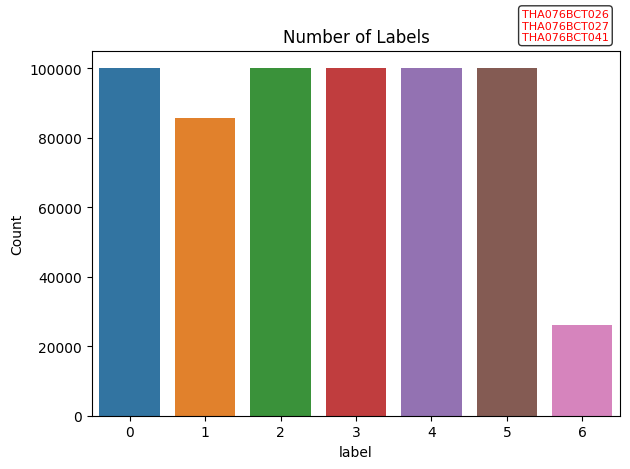

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
classes=['A', 'B', 'F', 'G', 'K', 'M','O']
# Create the count plot
sns.countplot(x='labels', data=data)

text_box = {
    'boxstyle': 'round',
    'facecolor': 'white',
    'alpha': 0.8
}

plt.text(5.2, 108000, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
# Set plot labels
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Number of Labels')
plt.tight_layout()
plt.savefig('output/Number of Label.png',bbox_inches='tight')
# Show the plot
plt.show()

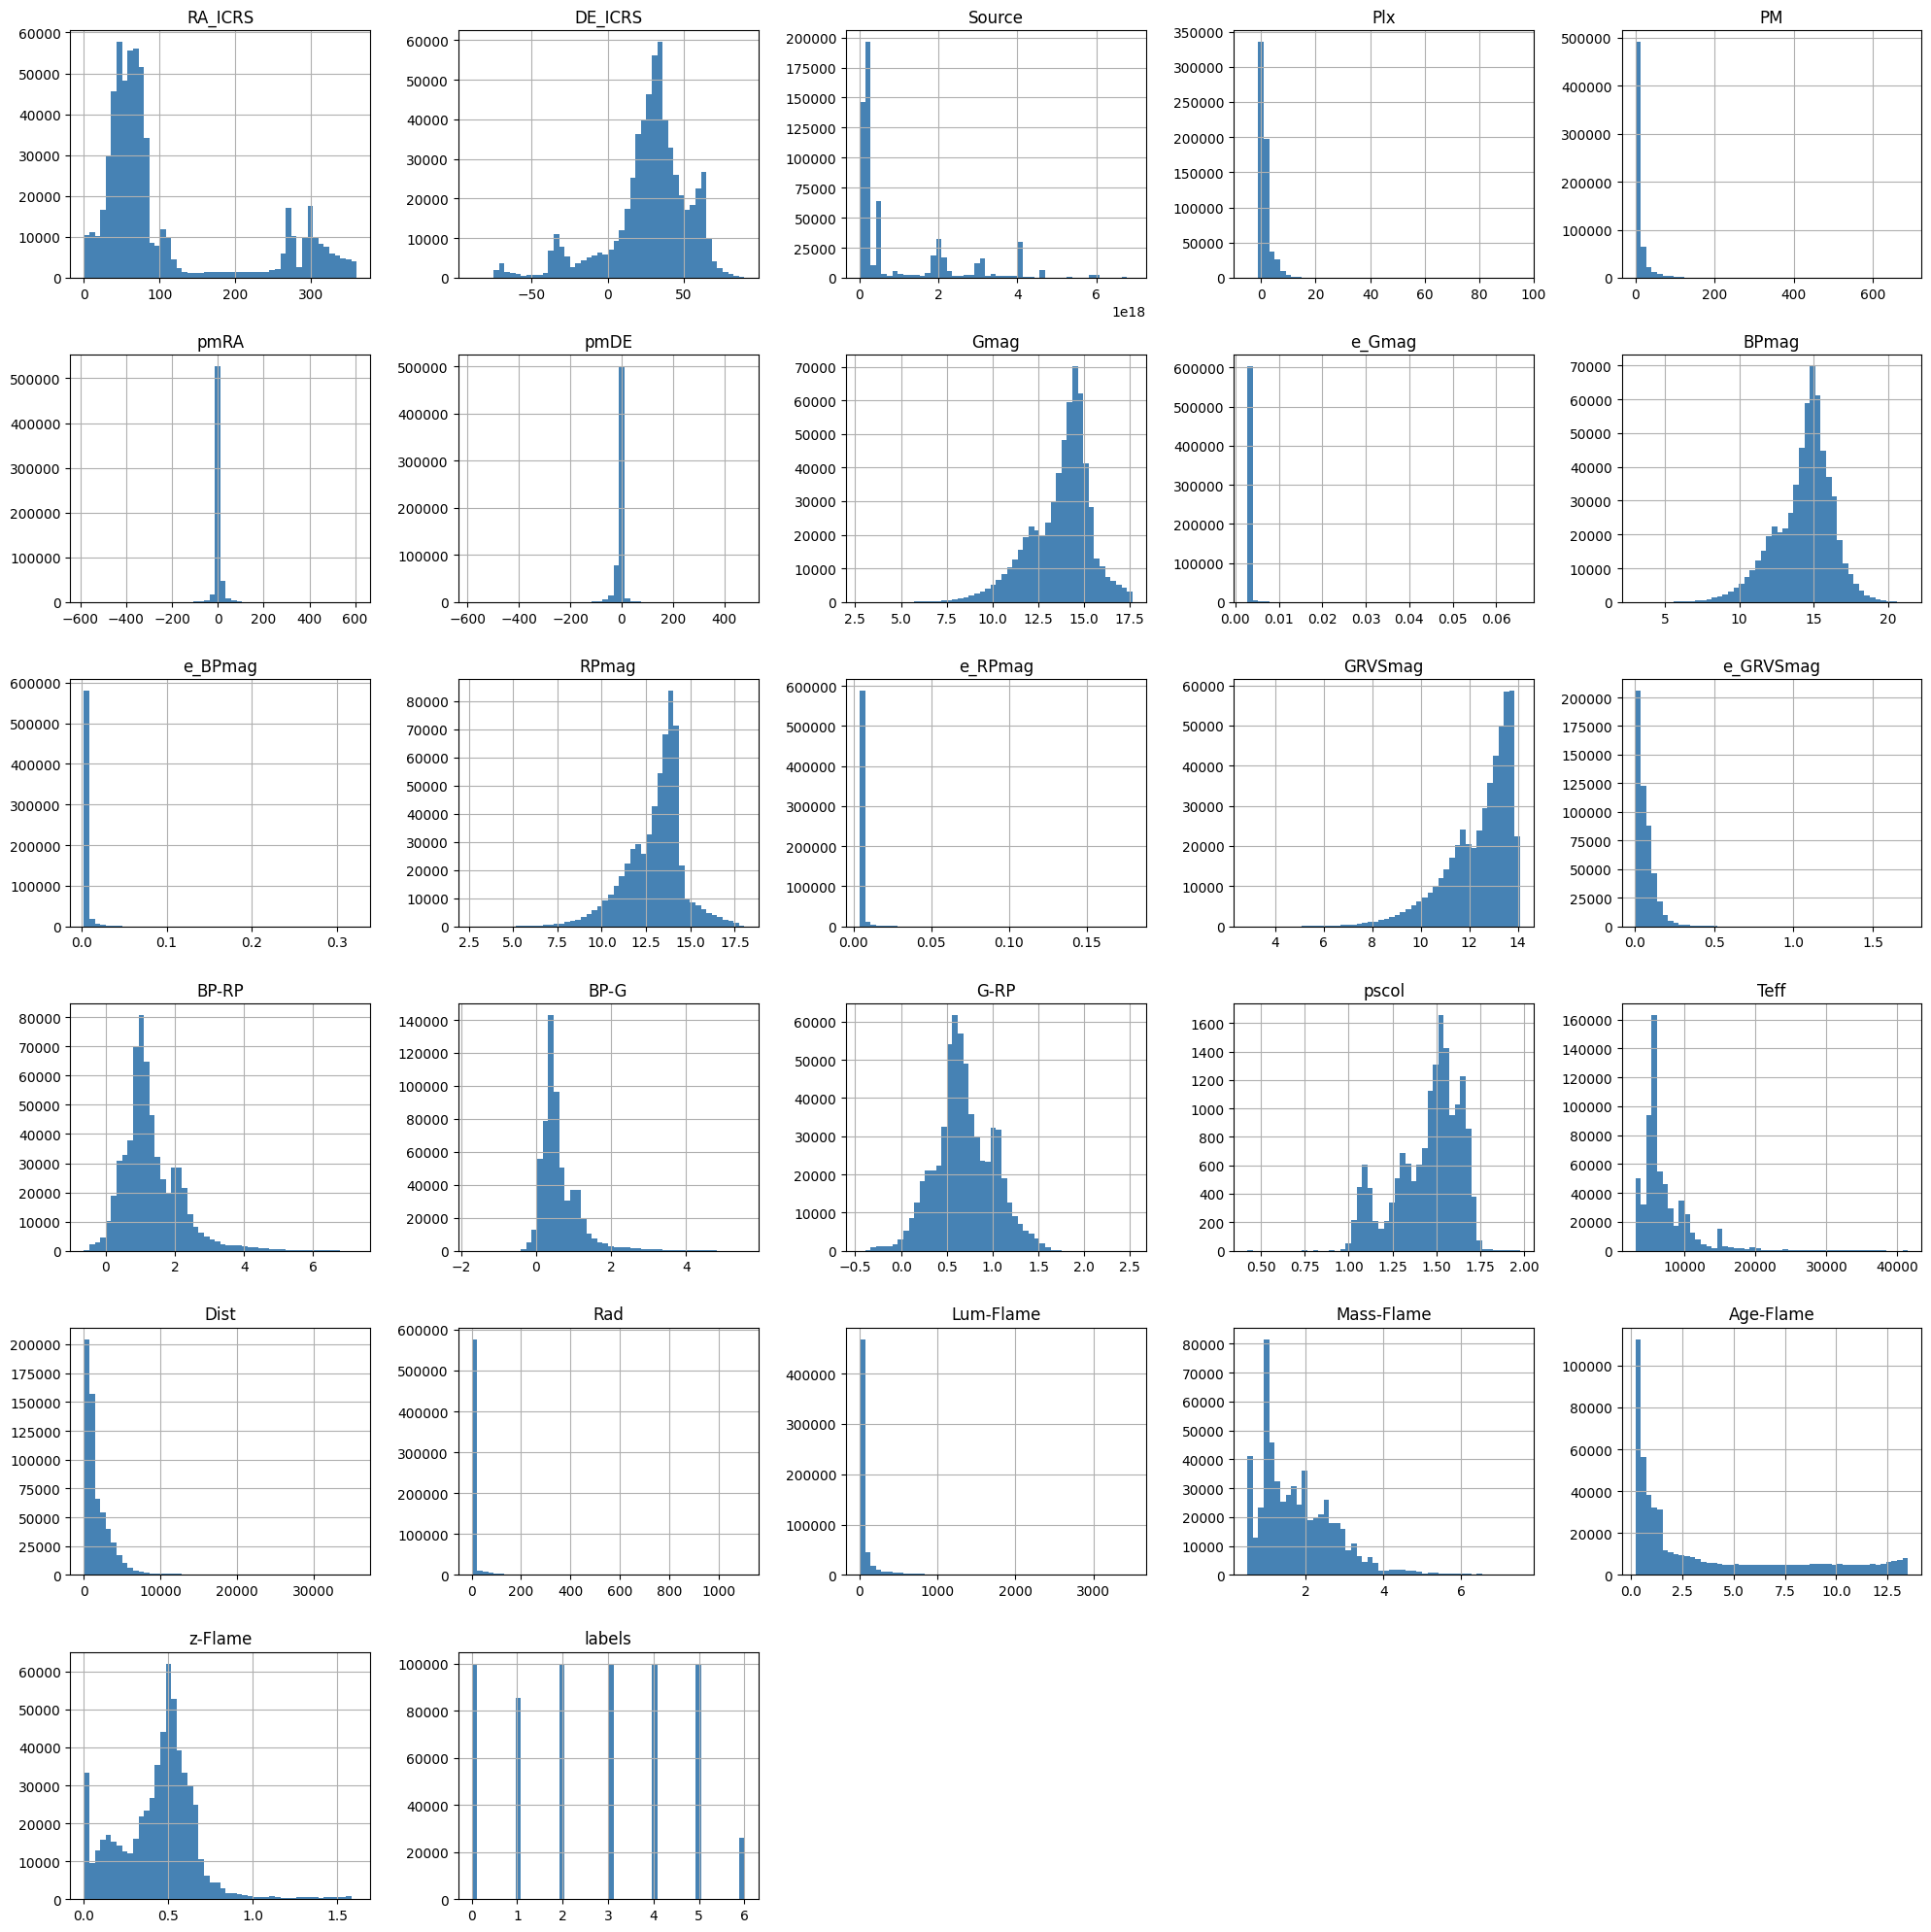

In [13]:
data.hist(bins=50, figsize=(20, 20),color='steelblue')
# the text isn't plotted
plt.text(1, 1, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=100, bbox=text_box, color='red')
plt.tight_layout()
plt.savefig('output/Histogram of features.png',bbox_inches='tight')
plt.show()


In [14]:
X=data.drop(columns=['labels'])
y=data['labels']

In [15]:
# Fill NaN values with the mean of the column
X.fillna(X.mean(), inplace=True)

In [16]:
X.describe()

,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,...,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
count,611689.000000,611689.000000,6.116890e+05,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,...,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000,611689.000000
mean,109.491138,27.375246,1.013625e+18,1.490339,11.264492,1.416328,-5.646765,13.720603,0.002857,14.350161,...,0.629558,0.689414,1.452694,7194.982554,2106.054944,8.141795,112.631363,1.815272,3.819473,0.441698
std,99.486049,26.856553,1.382727e+18,2.030546,19.482668,16.120819,14.583911,1.690559,0.000569,1.909605,...,0.526973,0.316330,0.030085,3738.516381,3212.887195,27.977752,325.156218,0.963336,3.889394,0.229643
min,0.000205,-89.098460,3.865554e+10,-5.014100,0.002000,-584.663000,-583.413000,2.740842,0.002757,3.023606,...,-1.710986,-0.452513,0.424200,3039.200000,10.519300,0.345400,0.034732,0.500000,0.200000,0.001505
25%,46.677751,18.623979,1.415008e+17,0.320800,2.450000,-2.274000,-7.027000,12.775880,0.002765,13.318072,...,0.323266,0.503698,1.452694,5187.000000,577.857500,1.329100,2.069124,1.050000,0.622000,0.314215
50%,67.259343,31.172183,2.137034e+17,0.872600,5.591000,0.128000,-3.015000,14.102624,0.002772,14.681240,...,0.480261,0.660124,1.452694,5922.600000,1077.115000,2.031500,11.733137,1.695000,2.384000,0.474071
75%,110.040669,43.118327,1.866048e+18,1.659900,11.078000,3.291000,-0.551000,14.792351,0.002796,15.559363,...,0.828534,0.909899,1.452694,7988.100000,2529.572300,4.009600,63.433160,2.359000,5.704000,0.565648
max,359.997541,89.774031,6.916186e+18,95.047700,688.189000,606.357000,478.562000,17.649721,0.065528,21.326849,...,5.552830,2.525836,1.977500,41504.000000,35666.805000,1105.995600,3499.921000,7.521000,13.500000,1.616032


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [18]:
df_scaled = pd.DataFrame(data=scaled_data, columns=X.columns)

In [19]:
df_scaled.describe()

,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,...,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
count,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,...,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05,6.116890e+05
mean,-2.542527e-16,-2.408710e-16,-2.081601e-16,1.390212e-16,-1.226658e-16,-2.787859e-17,-1.877158e-17,3.436129e-15,-2.323216e-17,-3.117941e-15,...,6.174178e-16,-3.977345e-16,-5.501375e-16,-4.014517e-16,6.839547e-17,-1.003629e-17,6.096118e-17,-3.315693e-16,1.293566e-16,-7.434290e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.100567e+00,-4.336886e+00,-7.330629e-01,-3.203299e+00,-5.780780e-01,-3.635546e+01,-3.961672e+01,-6.494758e+00,-1.762648e-01,-5.931364e+00,...,-4.441489e+00,-3.609929e+00,-3.418595e+01,-1.111614e+00,-6.522287e-01,-2.786643e-01,-3.462850e-01,-1.365332e+00,-9.306015e-01,-1.916856e+00
25%,-6.313794e-01,-3.258524e-01,-6.307283e-01,-5.759732e-01,-4.524277e-01,-2.289171e-01,-9.464100e-02,-5.588233e-01,-1.622143e-01,-5.404727e-01,...,-5.812292e-01,-5.870961e-01,0.000000e+00,-5.371072e-01,-4.756465e-01,-2.435042e-01,-3.400283e-01,-7.943987e-01,-8.221013e-01,-5.551350e-01
50%,-4.245000e-01,1.413785e-01,-5.785108e-01,-3.042234e-01,-2.912074e-01,-7.991712e-02,1.804569e-01,2.259735e-01,-1.499201e-01,1.733759e-01,...,-2.833106e-01,-9.259260e-02,0.000000e+00,-3.403445e-01,-3.202543e-01,-2.183985e-01,-3.103072e-01,-1.248498e-01,-3.690740e-01,1.409708e-01
75%,5.523707e-03,5.861919e-01,6.164798e-01,8.350524e-02,-9.572198e-03,1.162890e-01,3.494104e-01,6.339614e-01,-1.077686e-01,6.332215e-01,...,3.775831e-01,6.970115e-01,0.000000e+00,2.121478e-01,1.318184e-01,-1.476959e-01,-1.513065e-01,5.644222e-01,4.845301e-01,5.397523e-01
max,2.518007e+00,2.323412e+00,4.268785e+00,4.607502e+01,3.474499e+01,3.752546e+01,3.320160e+01,2.324155e+00,1.100691e+02,3.653474e+00,...,9.342554e+00,5.805411e+00,1.744393e+01,9.177182e+00,1.044568e+01,3.924028e+01,1.041743e+01,5.922889e+00,2.488957e+00,5.113734e+00


In [20]:
df_scaled.head()

,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,...,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
0,-0.623606,-0.937194,-0.732527,-0.155298,-0.142511,0.052520,-0.173769,-1.629048,-0.125332,-1.750214,...,-1.116215,-1.891825,0.000000,0.591603,-0.369716,-0.206350,-0.244405,0.456464,-0.878151,0.372390
1,-0.654524,-0.911486,-0.732048,0.198647,0.292029,0.348287,-0.670619,-1.982451,-0.098987,-2.046657,...,-1.056709,-1.661628,0.000000,0.576089,-0.443945,-0.202933,-0.266992,0.354734,-0.895635,0.855174
2,-0.668756,-0.910571,-0.731944,0.730278,-0.448424,0.023490,0.509244,-2.177758,-0.146407,-2.166630,...,-0.864902,-1.217954,0.000000,0.087125,-0.549738,-0.221951,-0.314016,-0.132116,-0.716429,0.286763
3,-0.657983,-0.900025,-0.731896,0.366090,-0.025073,-0.283319,-0.319409,-2.313096,-0.125332,-2.273615,...,-0.818412,-1.107873,4.750022,-0.038166,-0.520431,-0.184729,-0.282417,0.111828,-0.693032,-0.319641
4,-0.643584,-0.902468,-0.731795,1.244770,-0.062183,0.025537,1.064994,-3.287414,-0.100743,-3.221867,...,-1.128952,-1.889081,0.000000,0.745702,-0.577303,-0.209413,-0.205327,0.655771,-0.899748,0.294547


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df_scaled,df['labels'],test_size=0.01,random_state=43)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model with default parameters
knn = KNeighborsClassifier()

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((605572, 26), (605572,), (6117, 26), (6117,))

In [25]:
params=knn.get_params()
print(params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [26]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
preds=knn.predict(x_test.values)

E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
preds[:20]

array([5, 0, 1, 2, 4, 5, 4, 2, 3, 5, 5, 4, 2, 2, 4, 2, 3, 1, 4, 3])

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.8832761157430112


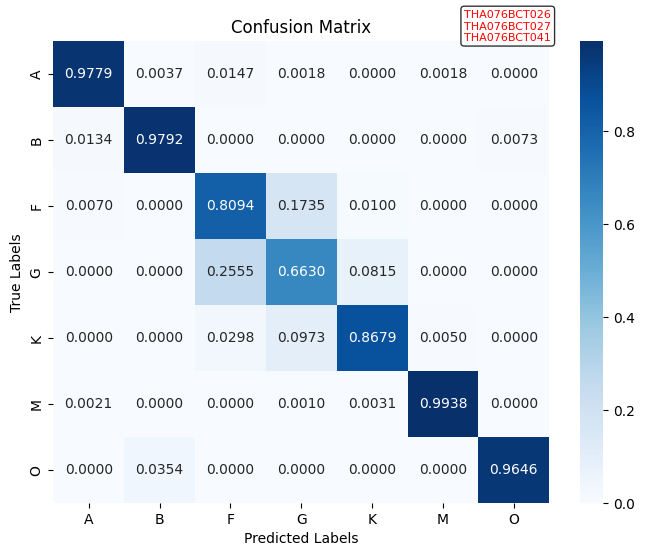

In [33]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Compute the confusion matrix
cm = confusion_matrix(y_test, preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes=['A', 'B', 'F', 'G', 'K', 'M','O']
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".4f",xticklabels=classes, yticklabels=classes, cbar=True)
plt.text(5.8, 0, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig('output/Confusion matrix for default KNN.png',bbox_inches='tight')
plt.show()

In [34]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, preds)

In [35]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1086
           1       0.98      0.98      0.98       819
           2       0.73      0.81      0.77       997
           3       0.71      0.66      0.68       994
           4       0.90      0.87      0.89      1007
           5       0.99      0.99      0.99       960
           6       0.98      0.96      0.97       254

    accuracy                           0.88      6117
   macro avg       0.90      0.89      0.89      6117
weighted avg       0.88      0.88      0.88      6117



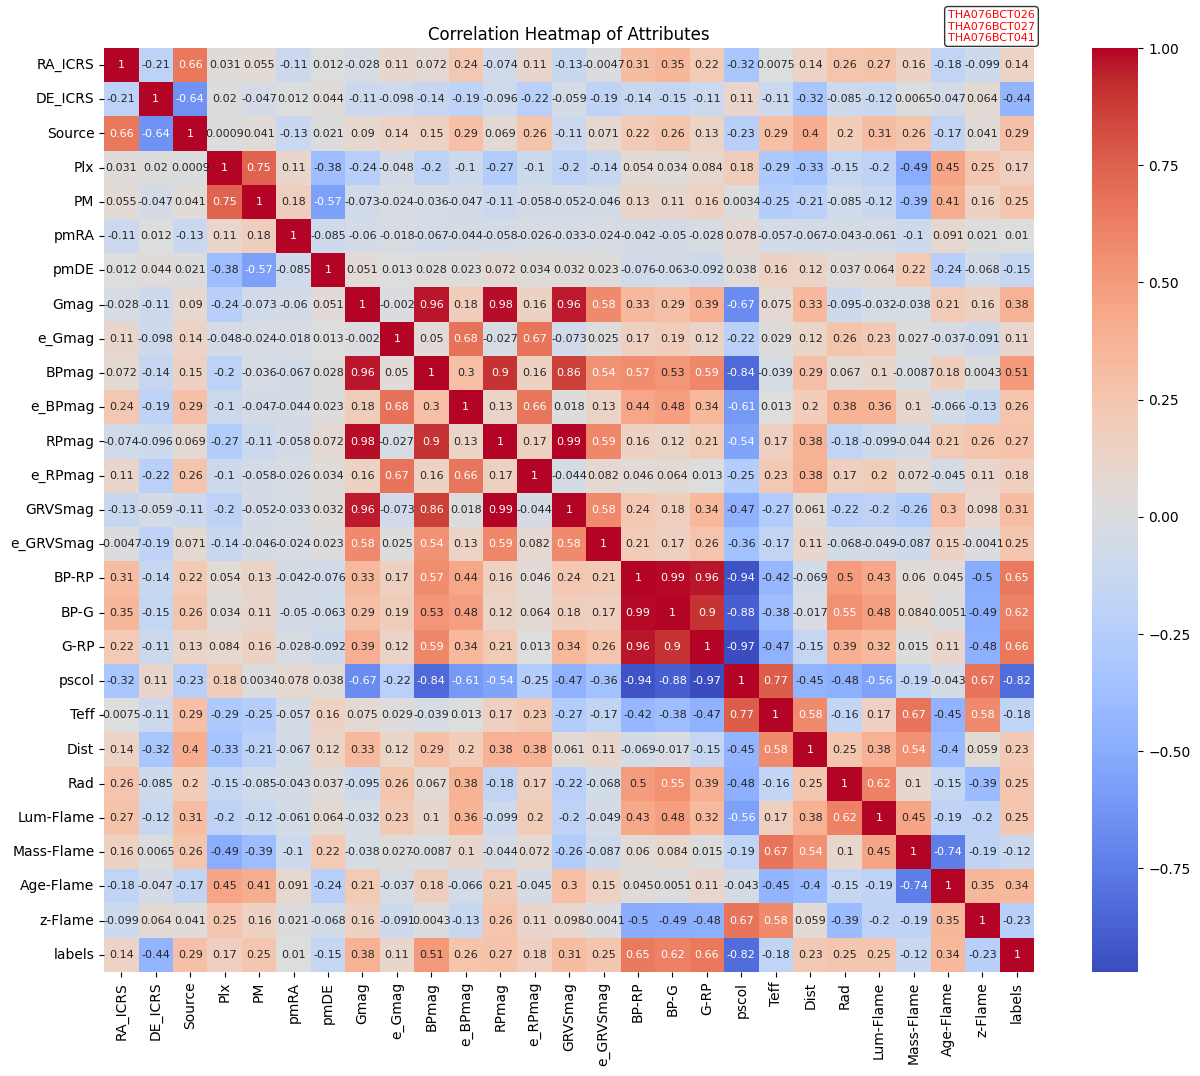

In [36]:
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={'fontsize': 8})
plt.title('Correlation Heatmap of Attributes')
plt.text(24.5, -0.2, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.savefig('output/Correlation Heatmap of Attributes.png',bbox_inches='tight')
plt.show()

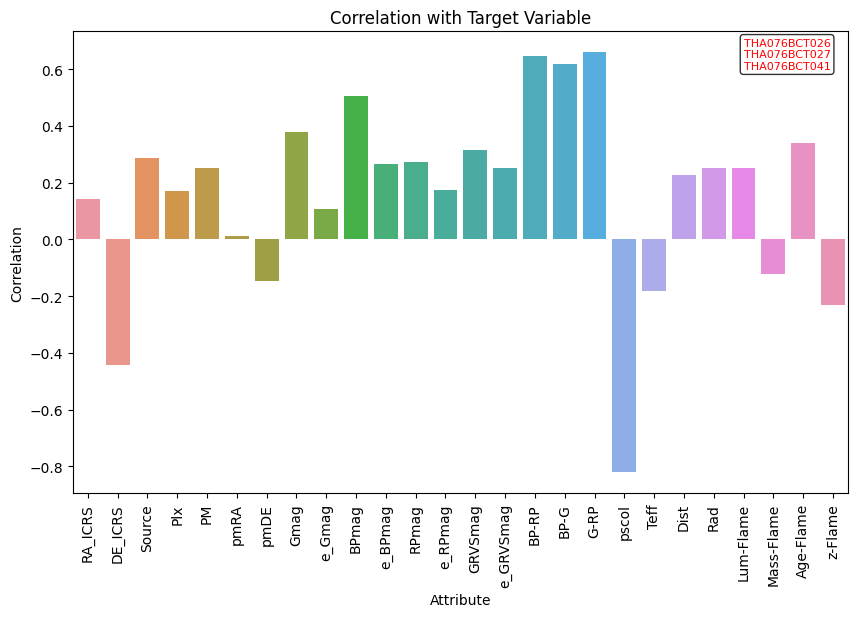

In [37]:
correlation_with_target = correlation_matrix['labels']
# Plot the correlation values as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target[:-1].index, y=correlation_with_target[:-1].values,)
plt.title('Correlation with Target Variable')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.text(22, 0.6, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.savefig('output/Correlation with Target Variable.png',bbox_inches='tight')
plt.show()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df_scaled,df['labels'],test_size=0.002,random_state=43)
weights = np.random.rand(26)
weighted_knn=KNeighborsClassifier(metric_params={'w': weights})
print(weights)

[0.95318186 0.60820561 0.75037244 0.38704668 0.83441972 0.34471037
 0.29028979 0.93004692 0.34344749 0.19974188 0.54046252 0.96898588
 0.49635853 0.56434567 0.60629585 0.3933393  0.12790219 0.69715787
 0.70879008 0.4461222  0.00733964 0.94654825 0.74760246 0.60092637
 0.64022491 0.06172655]


In [39]:
weighted_knn.fit(x_train,y_train)

KNeighborsClassifier(metric_params={'w': array([0.95318186, 0.60820561, 0.75037244, 0.38704668, 0.83441972,
       0.34471037, 0.29028979, 0.93004692, 0.34344749, 0.19974188,
       0.54046252, 0.96898588, 0.49635853, 0.56434567, 0.60629585,
       0.3933393 , 0.12790219, 0.69715787, 0.70879008, 0.4461222 ,
       0.00733964, 0.94654825, 0.74760246, 0.60092637, 0.64022491,
       0.06172655])})

In [40]:
x_test.values.shape

(1224, 26)

In [41]:
preds1=weighted_knn.predict(x_test.values)

E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Compute the confusion matrix
cm1 = confusion_matrix(y_test, preds1)
cm1 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes=['A', 'B', 'F', 'G', 'K', 'M','O']
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap="Blues", fmt=".4f",xticklabels=classes, yticklabels=classes, cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for random weighted KNN")
plt.text(6.1, 0, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.savefig('output/Confusion Matrix for random weighted KNN.png',bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds1)
print(accuracy)

In [41]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, preds1)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       227
           1       1.00      0.99      1.00       165
           2       0.69      0.79      0.74       185
           3       0.70      0.63      0.67       186
           4       0.92      0.89      0.90       198
           5       0.99      1.00      0.99       217
           6       1.00      1.00      1.00        46

    accuracy                           0.89      1224
   macro avg       0.90      0.90      0.90      1224
weighted avg       0.89      0.89      0.89      1224



In [42]:
correlation_with_target.index

Index(['RA_ICRS', 'DE_ICRS', 'Source', 'Plx', 'PM', 'pmRA', 'pmDE', 'Gmag',
       'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag', 'GRVSmag',
       'e_GRVSmag', 'BP-RP', 'BP-G', 'G-RP', 'pscol', 'Teff', 'Dist', 'Rad',
       'Lum-Flame', 'Mass-Flame', 'Age-Flame', 'z-Flame', 'labels'],
      dtype='object')

In [43]:
weights[18]=4
weights[17]=4
weights[16]=3
weights[15]=3

In [44]:
weighted_knn2=KNeighborsClassifier(metric_params={'w': weights})
print(weights)

[0.71316375 0.73128801 0.07606956 0.07338866 0.35638417 0.76896273
 0.99346992 0.47396845 0.72943478 0.21314962 0.51150465 0.8945958
 0.74810485 0.99299304 0.8932141  3.         3.         4.
 4.         0.78356792 0.95646886 0.81285664 0.83140896 0.70920858
 0.25812911 0.67622081]


In [45]:
weighted_knn2.fit(x_train,y_train)

KNeighborsClassifier(metric_params={'w': array([0.71316375, 0.73128801, 0.07606956, 0.07338866, 0.35638417,
       0.76896273, 0.99346992, 0.47396845, 0.72943478, 0.21314962,
       0.51150465, 0.8945958 , 0.74810485, 0.99299304, 0.8932141 ,
       3.        , 3.        , 4.        , 4.        , 0.78356792,
       0.95646886, 0.81285664, 0.83140896, 0.70920858, 0.25812911,
       0.67622081])})

In [46]:
preds2=weighted_knn2.predict(x_test.values)

E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds2)
print(accuracy)

0.8929738562091504


In [48]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, preds2)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       227
           1       1.00      0.99      1.00       165
           2       0.72      0.79      0.76       185
           3       0.72      0.68      0.70       186
           4       0.91      0.87      0.89       198
           5       0.99      1.00      0.99       217
           6       1.00      1.00      1.00        46

    accuracy                           0.89      1224
   macro avg       0.90      0.90      0.90      1224
weighted avg       0.89      0.89      0.89      1224



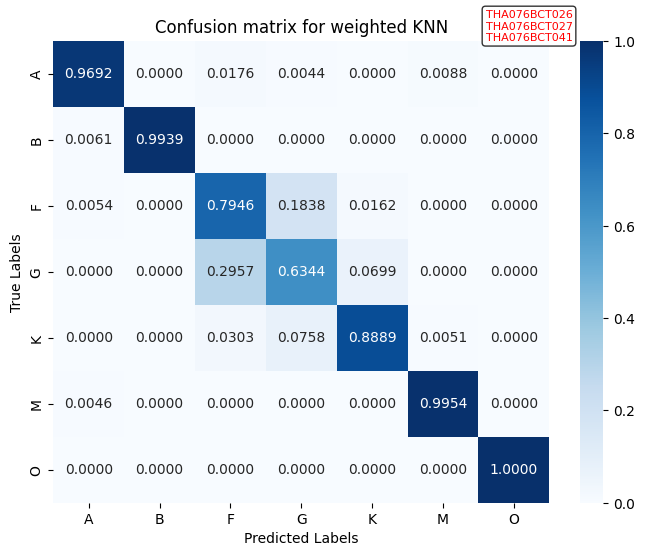

In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Compute the confusion matrix
cm2 = confusion_matrix(y_test, preds)
cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes=['A', 'B', 'F', 'G', 'K', 'M','O']
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap="Blues", fmt=".4f",xticklabels=classes, yticklabels=classes, cbar=True)
plt.text(6.1, 0, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion matrix for weighted KNN")
plt.savefig('output/Confusion matrix for weighted KNN.png',bbox_inches='tight')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
# split the dataset to perform validation as validating on whole dataset takes a lot of time since dataset size is huge
x_train1,x_val,y_train1,y_val=train_test_split(df_scaled,df['labels'],test_size=0.1,random_state=43)
# Define a range of K values to test
k_values = range(1, 30)  # You can adjust the range as needed

# Perform k-fold cross-validation
k_scores = []
for k in k_values:
    # Create a KNN classifier object
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_val.values, y_val.values, cv=10, scoring='accuracy',n_jobs=-1)
    k_scores.append(scores.mean())

# Find the K value with the best performance
best_k = k_values[np.argmax(k_scores)]

# Print the results
print("Mean accuracy scores for different K values:")
for k, score in zip(k_values, k_scores):
    print(f"K = {k}: Mean Accuracy = {score:.4f}")

print(f"\nBest K value: {best_k}")

Mean accuracy scores for different K values:
K = 1: Mean Accuracy = 0.8552
K = 2: Mean Accuracy = 0.8482
K = 3: Mean Accuracy = 0.8679
K = 4: Mean Accuracy = 0.8671
K = 5: Mean Accuracy = 0.8712
K = 6: Mean Accuracy = 0.8702
K = 7: Mean Accuracy = 0.8737
K = 8: Mean Accuracy = 0.8725
K = 9: Mean Accuracy = 0.8755
K = 10: Mean Accuracy = 0.8740
K = 11: Mean Accuracy = 0.8755
K = 12: Mean Accuracy = 0.8745
K = 13: Mean Accuracy = 0.8756
K = 14: Mean Accuracy = 0.8750
K = 15: Mean Accuracy = 0.8758
K = 16: Mean Accuracy = 0.8748
K = 17: Mean Accuracy = 0.8760
K = 18: Mean Accuracy = 0.8755
K = 19: Mean Accuracy = 0.8755
K = 20: Mean Accuracy = 0.8750
K = 21: Mean Accuracy = 0.8748
K = 22: Mean Accuracy = 0.8744
K = 23: Mean Accuracy = 0.8746
K = 24: Mean Accuracy = 0.8744
K = 25: Mean Accuracy = 0.8741
K = 26: Mean Accuracy = 0.8738
K = 27: Mean Accuracy = 0.8733
K = 28: Mean Accuracy = 0.8730
K = 29: Mean Accuracy = 0.8729

Best K value: 17


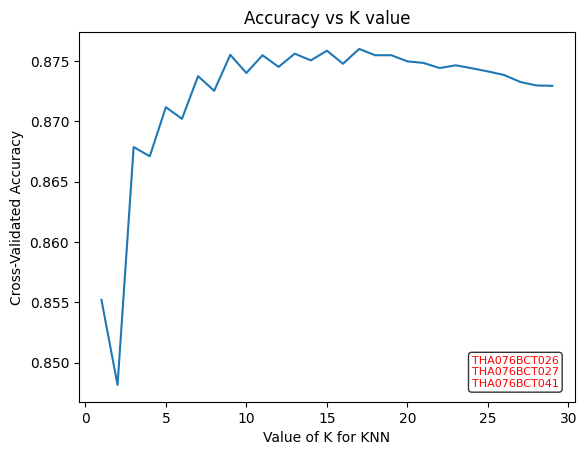

In [52]:
# plot to see clearly
plt.plot(k_values, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs K value')
plt.text(24, 0.848, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.savefig('output/Accuracy vs K value.png',bbox_inches='tight')
plt.show()

In [53]:
# train KNN for best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
x_train,x_test,y_train,y_test=train_test_split(df_scaled,df['labels'],test_size=0.002,random_state=43)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [54]:
preds=knn.predict(x_test.values)

E:\Major Project\Continual-Monument-Detection\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.9044117647058824


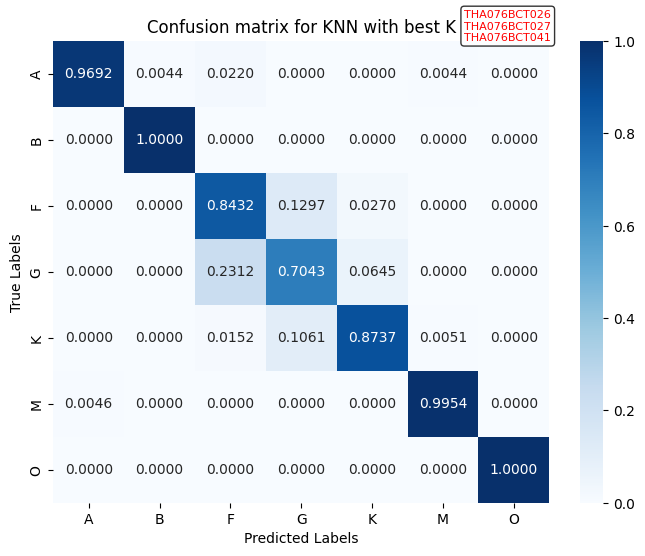

In [56]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Compute the confusion matrix
cm = confusion_matrix(y_test, preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes=['A', 'B', 'F', 'G', 'K', 'M','O']
# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".4f",xticklabels=classes, yticklabels=classes, cbar=True)
plt.text(5.8, 0, 'THA076BCT026\nTHA076BCT027\nTHA076BCT041', fontsize=8, bbox=text_box, color='red')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion matrix for KNN with best K")
plt.savefig('output/Confusion matrix for KNN with best K.png',bbox_inches='tight')
plt.show()

In [57]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       227
           1       0.99      1.00      1.00       165
           2       0.75      0.84      0.80       185
           3       0.74      0.70      0.72       186
           4       0.91      0.87      0.89       198
           5       0.99      1.00      0.99       217
           6       1.00      1.00      1.00        46

    accuracy                           0.90      1224
   macro avg       0.91      0.91      0.91      1224
weighted avg       0.91      0.90      0.90      1224

